In [1]:
%load_ext autoreload
%autoreload 1
%aimport gmm_utils

In [2]:
from gmm_utils import generateRandomClusterData, getInitialCentroids, calcResponsibilities, plotDataContours, maximizeLikelihood, gmm_em

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7)
%matplotlib inline

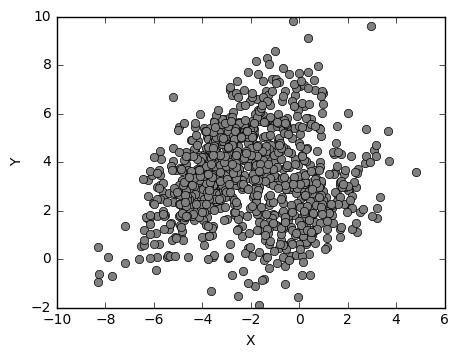

In [69]:
# generate random data points
nPoints = 1000
trueWeights = np.array([0.3, 0.7])
trueMeans = np.array([[0, 2],[-3, 4]])
trueCovs = np.array([[[2,1],[1,2]], [[3,2],[2,3]]])
data = generateRandomClusterData(nPoints, trueWeights, trueMeans, trueCovs)
trueParams = {'weights':trueWeights, 'means':trueMeans, 'covs':trueCovs}

fig = plt.figure(1, figsize=(5,5))
ax1 = plt.subplot(1,1,1)
plt.plot(data[:,0], data[:,1], color='0.5', marker='o', mec='k', ls='None')
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('scaled')
plt.tight_layout
plt.show()


In [70]:
# initial estimates of means and covariances
nClusters = 2
initMeans = getInitialCentroids(data)
initWeights = [0.5, 0.5]
initCovs = [[np.cov(data.T)][0] for i in np.arange(len(initWeights))]
initialParams = {'weights':np.array(initWeights), 'means':np.array(initMeans), 'covs':np.array(initCovs)}

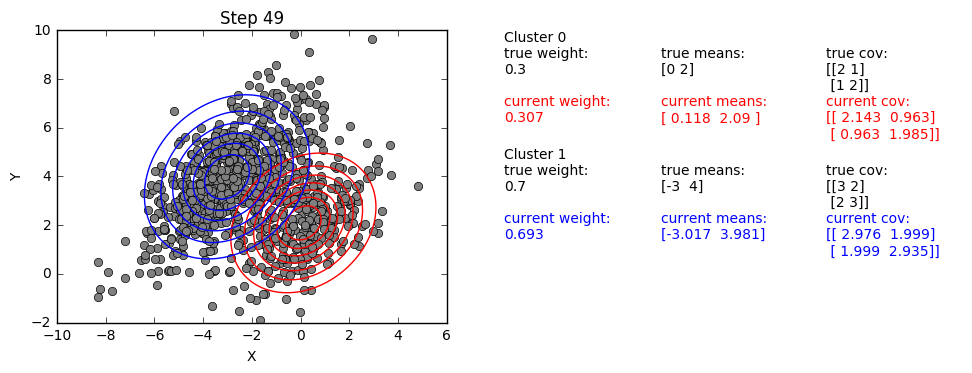

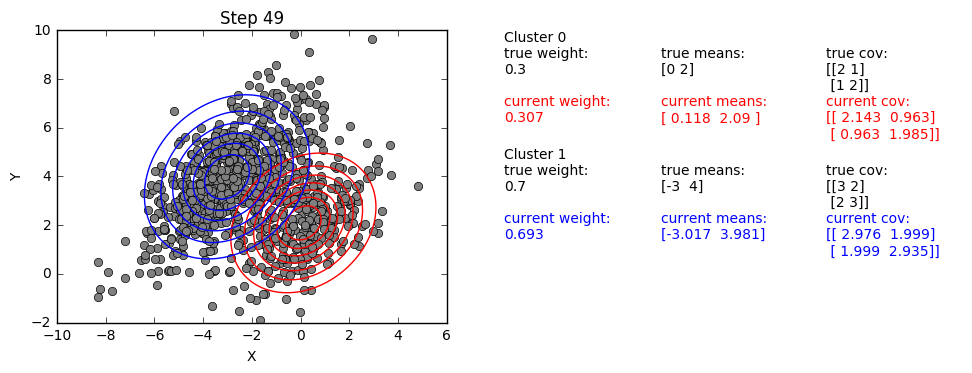

In [71]:
# run EM algorithm
results = gmm_em(data, initialParams, trueParams, maxSteps=50, visualize=True)